<a href="https://colab.research.google.com/github/scomentale/projects/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [5]:
df = pd.read_csv('https://github.com/scomentale/projects/blob/main/sentiment.csv?raw=true')

In [6]:
df['total_positive'] = df.positive + df.very_positive
df['total_negative'] = df.negative + df.very_negative

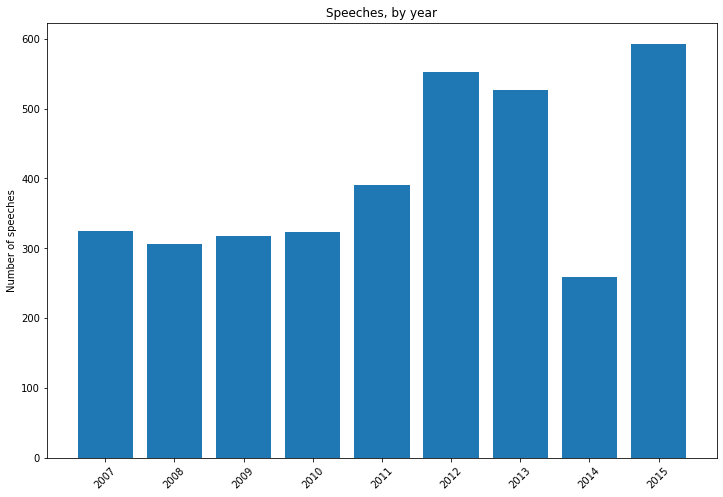

In [7]:
years = df['year'].to_numpy()
year_keys = np.unique(years)
year_labels = [str(x) for x in range(2007, 2016)]
year_count = {}

for year in year_keys:
    year_count[year] = df['year'].loc[df['year'] == year].count()

year, frequence = zip(*year_count.items()) 

ax = plt.bar(year, frequence, tick_label = year_labels) 
plt.xticks(rotation = 45)
plt.ylabel('Number of speeches')
plt.title('Speeches, by year')
plt.draw()
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('speeches_byyear.png', dpi=100)

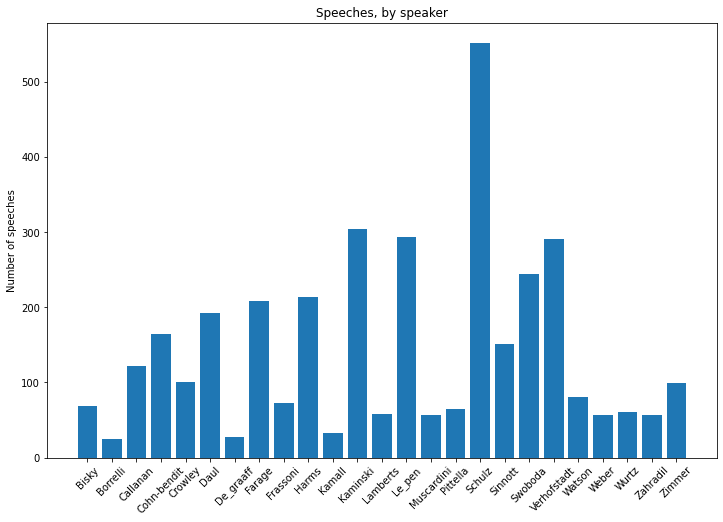

In [8]:
speakers = df['speaker'].to_numpy()
speaker_keys = np.unique(speakers)
speaker_count = {}

for speaker in speaker_keys:
    speaker_count[speaker] = df['speaker'].loc[df['speaker'] == speaker].count()

speaker, frequence = zip(*speaker_count.items()) 
speaker_labels = [x.capitalize() for x in speaker_keys]

ax = plt.bar(speaker, frequence, tick_label = speaker_labels) 
plt.xticks(rotation = 45)
plt.ylabel('Number of speeches')
plt.title('Speeches, by speaker')
plt.draw()

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('speeches_byspeaker.png', dpi=100)

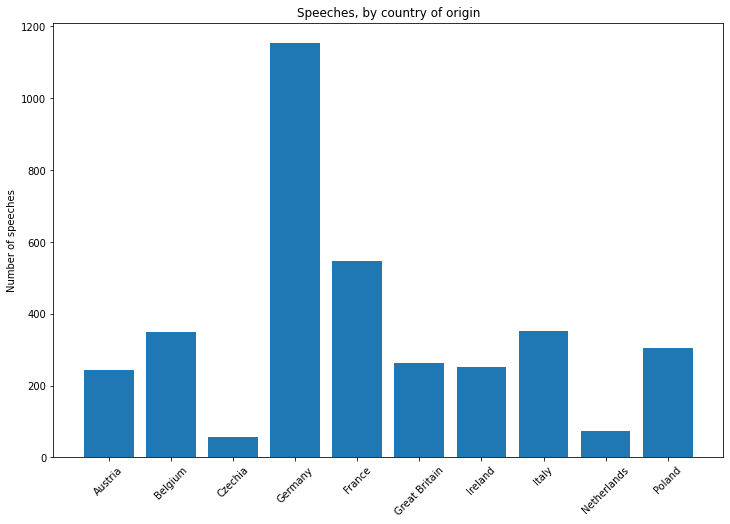

In [9]:
countries = df['country'].to_numpy()
country_keys = np.unique(countries)
country_count = {}

for country in country_keys:
    country_count[country] = df['country'].loc[df['country'] == country].count()

country, frequence = zip(*country_count.items()) 
country_labels = ['Austria', 'Belgium', 'Czechia', 'Germany', 'France', 'Great Britain', 'Ireland', 'Italy', 'Netherlands', 'Poland']

ax = plt.bar(country, frequence, tick_label = country_labels) 
plt.xticks(rotation = 45)
plt.ylabel('Number of speeches')
plt.title('Speeches, by country of origin')
plt.draw()

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('speeches_bycountry.png', dpi=100)

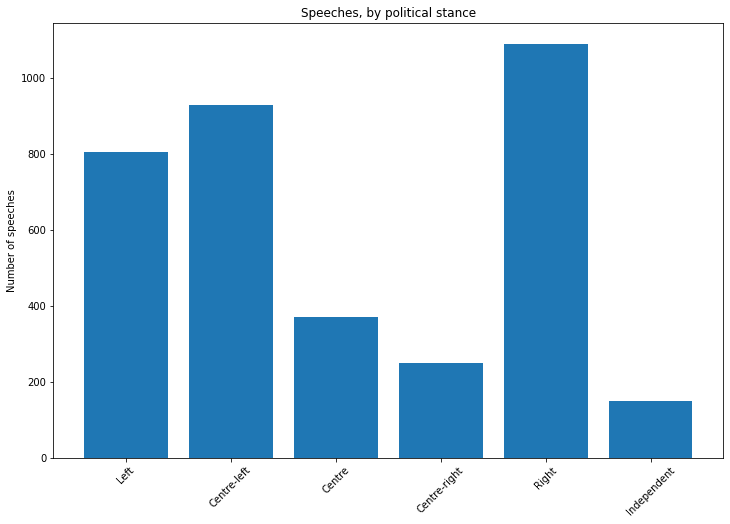

In [10]:
positions = df['position'].to_numpy()
position_keys = ['left', 'centreleft', 'centre', 'centreright', 'right', 'None']
position_labels = ['Left', 'Centre-left', 'Centre', 'Centre-right', 'Right', 'Independent']
position_count = {}

for position in position_keys:
    position_count[position] = df['position'].loc[df['position'] == position].count()

position, frequence = zip(*position_count.items()) 

ax = plt.bar(position, frequence, tick_label = position_labels) 
plt.xticks(rotation = 45)
plt.ylabel('Number of speeches')
plt.title('Speeches, by political stance')
plt.draw()

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('speeches_byposition.png', dpi=100)

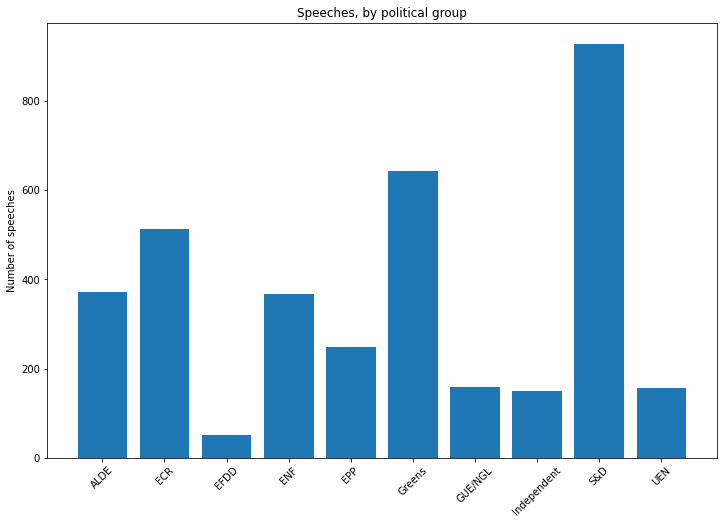

In [11]:
parties = df['group'].to_numpy()
party_keys = np.unique(parties)
party_labels = ['ALDE', 'ECR', 'EFDD', 'ENF', 'EPP', 'Greens', 'GUE/NGL', 'Independent', 'S&D', 'UEN']
party_count = {}

for party in party_keys:
    party_count[party] = df['group'].loc[df['group'] == party].count()

party, frequence = zip(*party_count.items()) 

ax = plt.bar(party, frequence, tick_label = party_labels) 
plt.xticks(rotation = 45)
plt.ylabel('Number of speeches')
plt.title('Speeches, by political group')
plt.draw()

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('speeches_bygroup.png', dpi=100)

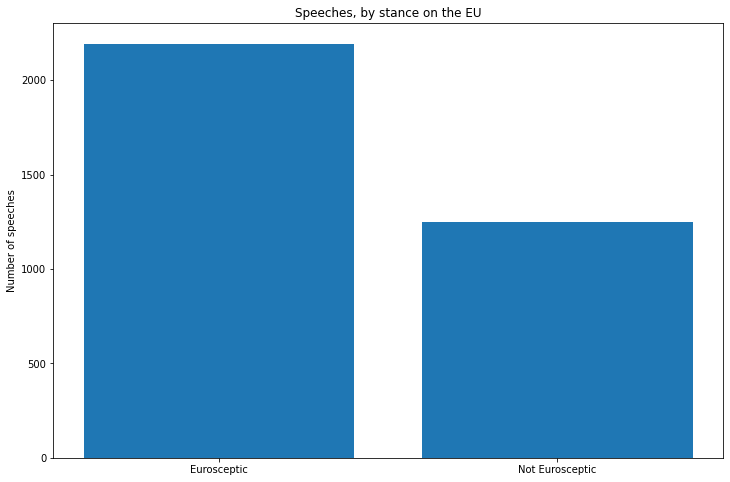

In [12]:
es = df['eurosceptic'].dropna().to_numpy()
es_keys = np.unique(es)
es_count = {}
es_labels = ['Eurosceptic', 'Not Eurosceptic']

for es in es_keys:
    es_count[es] = df['eurosceptic'].loc[df['eurosceptic'] == es].count()

es, frequence = zip(*es_count.items()) 

ax = plt.bar(es, frequence, tick_label = es_labels) 
plt.xticks(rotation = 0)
plt.ylabel('Number of speeches')
plt.title('Speeches, by stance on the EU')
plt.draw()

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('speeches_bystance.png', dpi=100)

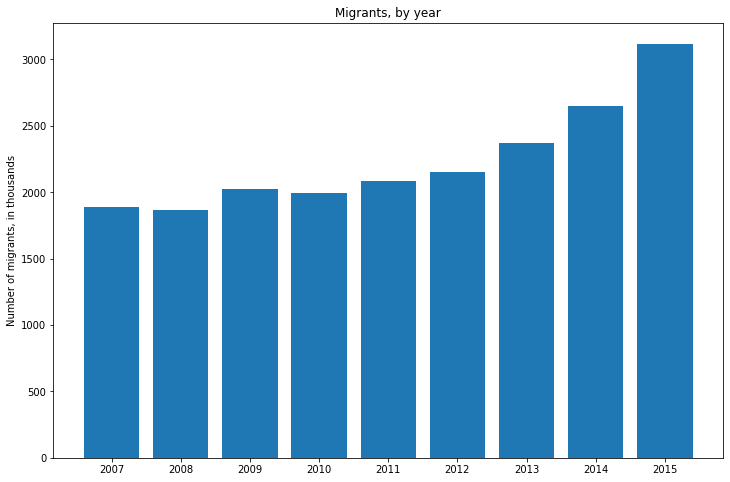

In [13]:
mig = [float(x) for x in df['migrants'].to_numpy()]
mig_keys = [x for x in range(2007, 2016)]
mig_count = {}
mig_labels = [x for x in range(2007, 2016)]

for year in mig_keys:
    mig_count[year] = df['migrants'].loc[df['year'] == year].unique().sum()

mig, frequence = zip(*mig_count.items()) 

ax = plt.bar(mig, frequence, tick_label = mig_labels) 
plt.xticks(rotation = 0)
plt.ylabel('Number of migrants, in thousands')
plt.title('Migrants, by year')
plt.draw()

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('migrants_byyear.png', dpi=100)

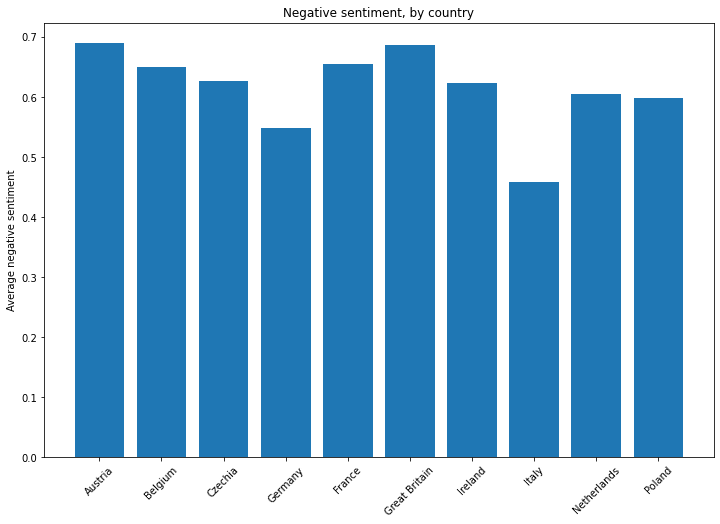

In [14]:
### negative sentiment in each country

sent = df['total_negative'].tolist()
sent_keys = df['country'].tolist()

sent_count = {}
sent_labels = country_labels

for country in sent_keys:
    sent_count[country] = df['total_negative'].loc[df['country'] == country].mean()


sentpos_count = {}

for position in position_keys:
    sentpos_count[position] = df['total_negative'].loc[df['position'] == position].mean()

sent, frequence = zip(*sent_count.items()) 

ax = plt.bar(sent, frequence, tick_label = country_labels) 
plt.ylabel('Average negative sentiment')
plt.title('Negative sentiment, by country')
plt.xticks(rotation = 45)
plt.draw()

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('sentiment_bycountry.png', dpi=100)

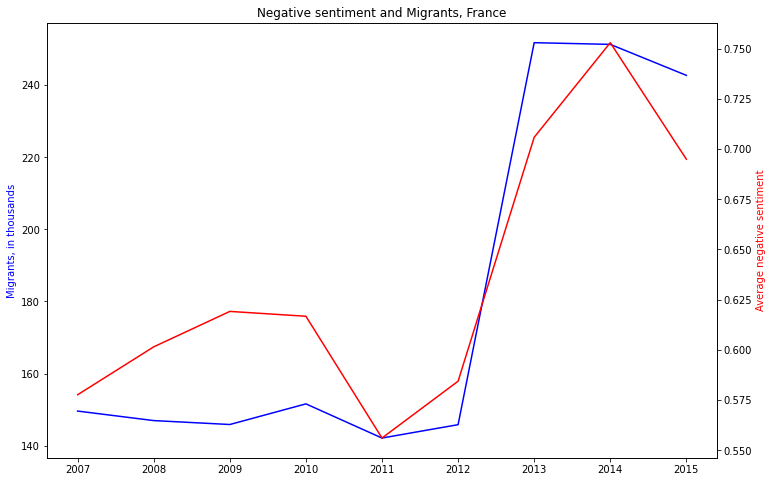

In [15]:
migfr_count = df['migrants'].loc[df['country'] == 'fr'].unique()
migfr_labels = [x for x in range(2007, 2016)]

sentfr = []

for x in migfr_labels:
    sentfr.append(df['total_negative'].loc[df['country'] == 'fr'].loc[df['year'] == x].mean())

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(migfr_labels, migfr_count, color = 'blue')
ax2.plot(migfr_labels, sentfr, color = 'red')

ax1.set_ylabel('Migrants, in thousands', color = 'blue')
ax2.set_ylabel('Average negative sentiment', color = 'red')
plt.title('Negative sentiment and Migrants, France')
plt.xticks(rotation = 0)

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('sentimentmigrants_france.png', dpi=100)
plt.show()

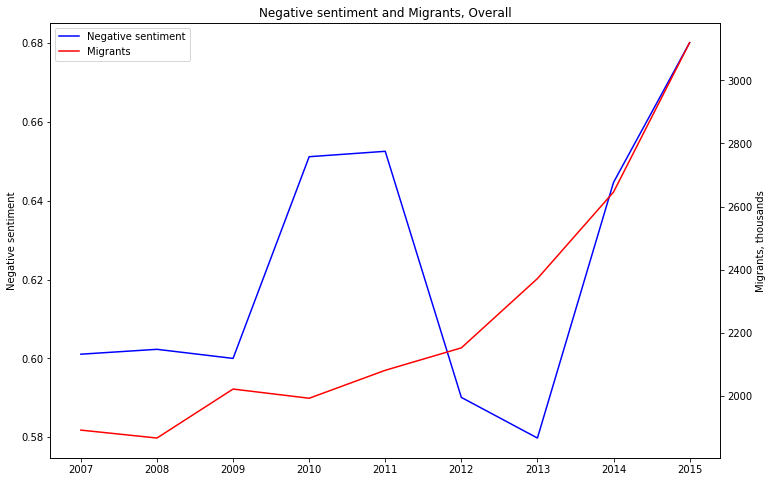

In [21]:
years = [x for x in range(2007, 2016)]
sent = []
migrat = []

for year in years:
    sent.append(df['total_negative'].loc[df['year'] == year].mean())
    migrat.append(df['migrants'].loc[df['year'] == year].unique().sum())

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
line1, = ax1.plot(years, sent, label = 'Overall negative sentiment', color = 'blue')
line2, = ax2.plot(years, migrat, label = 'Migrants, in thousands', color = 'red')

ax1.set_ylabel('Negative sentiment')
ax2.set_ylabel('Migrants, thousands')
plt.title('Negative sentiment and Migrants, Overall')
plt.xticks(rotation = 0)
plt.legend([line1, line2], ['Negative sentiment', 'Migrants'])

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [16]:
years = [x for x in range(2007, 2016)]
sent = []
unempl = []

for year in years:
    sent.append(df['total_negative'].loc[df['year'] == year].mean())
    unempl.append(df['unemployment'].loc[df['year'] == year].mean())

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
line1, = ax1.plot(years, sent, label = 'Overall negative sentiment', color = 'blue')
line2, = ax2.plot(years, unempl, label = 'Unemployment, %', color = 'red')

ax1.set_ylabel('Negative sentiment')
ax2.set_ylabel('Average unemployment, %')
plt.title('Negative sentiment and Unemployment, Overall')
plt.xticks(rotation = 0)
plt.legend([line1, line2], ['Negative sentiment', 'Unemployment'])

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
years = [x for x in range(2007, 2016)]

sentit = []
unemplit = []

for year in years:
    sentit.append(df['total_negative'].loc[df['year'] == year].loc[df['country'] == 'it'].mean())
    unemplit.append(df['unemployment'].loc[df['year'] == year].loc[df['country'] == 'it'].mean())

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
line1, = ax1.plot(years, sentit, label = 'Negative sentiment', color = 'blue')
line2, = ax2.plot(years, unemplit, label = 'Unemployment, %', color = 'red')

ax1.set_ylabel('Negative sentiment')
ax2.set_ylabel('Average unemployment, %')
plt.title('Negative sentiment and Unemployment, Italy')
plt.xticks(rotation = 0)
plt.legend([line1, line2], ['Negative sentiment', 'Unemployment'])

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [ ]:
migde_count = df['migrants'].loc[df['country'] == 'de'].unique()
migde_labels = [x for x in range(2007, 2016)]
sentde = []

for x in migfr_labels:
    sentde.append(df['total_negative'].loc[df['country'] == 'de'].loc[df['year'] == x].mean())

# miggb_count = df['migrants'].loc[df['country'] == 'fr'].unique()
# miggb_labels = [x for x in range(2007, 2016)]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(migde_labels, migde_count, color = 'blue')
ax2.plot(migde_labels, sentde, color = 'red')

ax1.set_ylabel('Migrants, in thousands', color = 'blue')
ax2.set_ylabel('Average negative sentiment', color = 'red')
plt.title('Negative sentiment and Migrants, Germany')
plt.xticks(rotation = 0)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('sentimentmigrants_de.png', dpi=100)
plt.show()

In [ ]:
miggb_count = df['migrants'].loc[df['country'] == 'gb'].unique()
miggb_labels = [x for x in range(2007, 2016)]
sentgb = []

for x in miggb_labels:
    sentgb.append(df['total_negative'].loc[df['country'] == 'gb'].loc[df['year'] == x].mean())


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(miggb_labels, miggb_count, color = 'blue')
ax2.plot(miggb_labels, sentgb, color = 'red')

ax1.set_ylabel('Migrants, in thousands', color = 'blue')
ax2.set_ylabel('Average negative sentiment', color = 'red')
plt.title('Negative sentiment and Migrants, Great Britain')
plt.xticks(rotation = 0)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('sentimentmigrants_gb.png', dpi=100)
plt.show()

In [ ]:
migit_count = df['migrants'].loc[df['country'] == 'it'].unique()
migit_labels = [x for x in range(2007, 2016)]
sentit = []

for x in migit_labels:
    sentit.append(df['total_negative'].loc[df['country'] == 'it'].loc[df['year'] == x].mean())


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(migit_labels, migit_count, color = 'blue', label = 'Migrants')
ax2.plot(migit_labels, sentit, color = 'red', label = 'Negative sentiment')

ax1.set_ylabel('Migrants, in thousands', color = 'blue')
ax2.set_ylabel('Average negative sentiment', color = 'red')
plt.title('Negative sentiment and Migrants, Italy')
plt.xticks(rotation = 0)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('sentimentmigrants_it.png', dpi=100)
plt.show()

In [ ]:
migcountry_count = {}
countries = np.sort(df.country.unique())
country_labels = ['Austria', 'Belgium', 'Czechia', 'Germany', 'France', 'Great Britain', 'Ireland', 'Italy', 'Netherlands', 'Poland'] 

for country in countries:
    migcountry_count[country] = df['migrants'].loc[df['country'] == country].unique().sum()

mg, frequence = zip(*migcountry_count.items()) 

ax = plt.bar(mg, frequence, tick_label = country_labels) 
plt.ylabel('Migrants, in thousands')
plt.title('Migrants, by country')
plt.xticks(rotation = 45)
plt.draw()

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('migrants_bycountry.png', dpi = 100)

In [ ]:
eurosceptic = []
not_eurosceptic = []
migrants = []
years = [x for x in range(2007, 2016)]

for year in years:
   eurosceptic.append(df['total_negative'].loc[(df['eurosceptic'] == True) & (df['year'] == year)].mean())
   not_eurosceptic.append(df['total_negative'].loc[(df['eurosceptic'] == False) & (df['year'] == year)].mean())
   migrants.append(df['migrants'].loc[df['year'] == year].unique().sum())

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1, = ax1.plot(years, eurosceptic, color = 'red', label = 'Eurosceptic', linewidth = 3)
line2, = ax1.plot(years, not_eurosceptic, color = 'blue', label = 'Not Eurosceptic', linewidth = 3)
line3, = ax2.plot(years, migrants, color = 'black', label = 'Migrants', linestyle = '--')
plt.legend([line1, line2, line3], ['Eurosceptic', 'Not Eurosceptic', 'Migrants'])
ax1.set_ylabel('Negative sentiment')
ax2.set_ylabel('Migrants, in thousands')
plt.title('Average negative sentiment across Eurosceptic and Non-Eurosceptic Speakers')
fig = plt.gcf()
fig.set_size_inches(12, 8)